# Opdracht classificatie 1 - logistic regression

In [93]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

## Opdracht 1: Classificatie van wijn

Het doel van deze classificatie is te kunnen achterhalen op basis van chemische parameters van welke wijnboer (cultivar) een wijn afkomstig is.

Gebruik hiervoor de dataset *wine_data.csv*

### Inlezen van de dataset en vooranalyse

In [94]:
# inlezen van de data
dataset = pd.read_csv('wine_data.csv')
dataset.head(10)


,inputs Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline,Cultivar
0,12.08,1.33,2.30,23.6,70,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625,1
1,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630,1
2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,1
3,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,1
4,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580,1
5,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510,1
6,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495,1
7,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372,1
8,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,2
9,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480,1


Bepaal het aantal klasses (hoeveel verschillende wijnboeren zijn er?)

In [95]:
klasses = dataset.Cultivar.unique()

print(klasses)

[1 2 0]


Bepaal de verdeling van het aantal wijnen per wijnboer. Met andere woorden: hoeveel wijnen van elke wijnboer steken in de dataset? Is de dataset gebalanceerd?

In [96]:
g = dataset.groupby('Cultivar')
aantal = g.Cultivar.count()
print(aantal)

Cultivar
0    59
1    71
2    48
Name: Cultivar, dtype: int64


Bepaal de statistische kerngetallen van de verschillende features en target. Gebruik hiervoor de *describe* functie.

In [97]:
dataset.describe()

,inputs Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline,Cultivar
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Bepaal de onderlinge correlatie via een heatmap. Wat kan je hieruit concluderen?

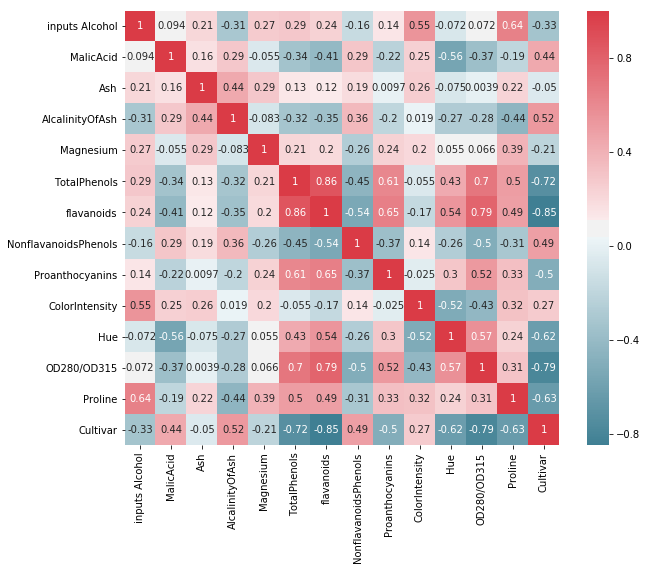

In [98]:
dataset.corr()

f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

### Preprocessing en opsplitsen van de dataset

Splits de dataset in **features en targets**.

In [107]:
features = list(dataset.columns[0:13])
print(features)
X= dataset[features].values
print(X)
y= dataset['Cultivar'].values
print(y)

['inputs Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 'flavanoids', 'NonflavanoidsPhenols', 'Proanthocyanins', 'ColorIntensity', 'Hue', 'OD280/OD315', 'Proline']
[[ 12.08   1.33   2.3  ...   1.07   3.21 625.  ]
 [ 12.08   1.13   2.51 ...   1.31   2.72 630.  ]
 [ 12.37   1.17   1.92 ...   1.12   3.48 510.  ]
 ...
 [ 12.99   1.67   2.6  ...   1.31   3.5  985.  ]
 [ 12.21   1.19   1.75 ...   1.28   3.07 718.  ]
 [ 12.47   1.52   2.2  ...   1.16   2.63 937.  ]]
[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 2 2 2 2 2 2 0 2 1 1 0 2 2 0 1 1 0 2 2 2 0 1 1 2 0 1 0 0 2 0
 1 2 2 2 0 0 2 0 1 1 2 2 0 1 1 1 2 0 0 2 0 2 1 1 0 0 1 1 1 2 0 0 0 0 0 1 0
 2 0 2 0 0 1 1 2 0 0 1 2 0 2 0 2 2 2 0 1 0 2 0 1 0 0 0 0 1 0 2 0 0 1 2 2 2
 0 0 2 0 0 0 2 0 0 0 0 0 0 1 2 2 0 0 2 2 0 0 0 0 0 1 1 1 1 1]


**Normaliseer de dataset**. Zorg er dus voor dat de features op een gelijke schaalverdeling staan. Voor het normaliseren kan gebruik gemaakt worden van de *preprocessing.StandardScaler()*. Meer info over het gebruik ervan is te vinden op http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [108]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[-1.13720713 -0.90336179 -0.24314178 ...  0.49379744  0.84508517
  -0.38816832]
 [-1.13720713 -1.08289442  0.52447981 ...  1.54675873  0.15298819
  -0.37224585]
 [-0.77898029 -1.0469879  -1.63217132 ...  0.71316437  1.22644473
  -0.7543851 ]
 ...
 [-0.01311602 -0.59815632  0.8534605  ...  1.54675873  1.25469358
   0.75824943]
 [-0.97662269 -1.02903463 -2.25357928 ...  1.41513857  0.64734317
  -0.0920104 ]
 [-0.6554538  -0.7328058  -0.60867587 ...  0.88865792  0.02586833
   0.60539373]]


Creëer een **trainingset en een testset**. Zorg dat je minimum 70 wijnen in de testset hebt. 

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=0)

### Trainen van een logistic regression classifier en testen van het bekomen model

Train een logistic regression classifier op de training data. Kies C=1 als startwaarde. Tip: Gebruik multi_class='multinomial' bij de intitialisatie van de logistic regression classifier. We hebben hier namelijk te maken met meer dan twee klasses.

Test het getrainde model op de test set. Bepaal hierbij de confusion matrix, de accuracy en het classification report. Wat zijn de bevindingen?

Probeer indien nodig de performantie van de classifier te verhogen door de parameter C  aan te passen.

In [110]:
logreg = linear_model.LogisticRegression(C=1)

logreg.fit(X_train, y_train)

y_predict = logreg.predict(X_test)

print(classification_report(y_test,y_predict))

print(accuracy_score(y_test,y_predict))

print(confusion_matrix(y_test,y_predict))



             precision    recall  f1-score   support

          0       1.00      1.00      1.00        22
          1       1.00      0.96      0.98        25
          2       0.96      1.00      0.98        25

avg / total       0.99      0.99      0.99        72

0.9861111111111112
[[22  0  0]
 [ 0 24  1]
 [ 0  0 25]]


### Voorspel aan de hand van het getrainde model

Voorspel van welke wijnboer een wijn afkomstig is met volgende samenstelling:

inputs Alcohol: 13.52 - 
MalicAcid: 2.05 - 
Ash: 2.20 - 
AlcalinityOfAsh: 17.3 - 
Magnesium: 120 - 
TotalPhenols: 2.60 - 
flavanoids: 3.52 - 
NonflavanoidsPhenols: 0.30 - 
Proanthocyanins: 2.28 - 
ColorIntensity: 7.80 - 
Hue: 0.77 - 
OD280/OD315: 2.90 - 
Proline: 862


Geef ook de zekerheid van het model weer dat de wijn van die bepaalde wijnboer afkomstig is.

In [120]:
wine = np.array([13.52,2.05,2.20,17.3,120,2.60,3.52,0.3,2.28,7.80,0.77,2.90,862])

print(wine)

wine = scaler.transform(wine.reshape(1,-1))
print(wine)


y_predict = logreg.predict(wine)
print(y_predict)


y_proba = logreg.predict_proba(wine)
print(y_proba)


[1.352e+01 2.050e+00 2.200e+00 1.730e+01 1.200e+02 2.600e+00 3.520e+00
 3.000e-01 2.280e+00 7.800e+00 7.700e-01 2.900e+00 8.620e+02]
[[ 0.64157442 -0.25704433 -0.60867587 -0.65910869  1.42241183  0.48853108
   1.49664365 -0.49840699  1.20736314  1.18606801 -0.82240418  0.40722789
   0.3665567 ]]
[0]
[[0.88031009 0.01750336 0.10218655]]


## Opdracht 2: Diabetes

Het bestand *diabetes.csv* bevat medische gegevens van meer dan 300 personen waarbij telkens geweten is of de persoon al dan niet diabetes heeft.
Train nu een logic regression model dat op basis van de features een zo goed mogelijke predictie kan doen of iemand al dan niet diabetes heeft.

### Inlezen van de dataset en vooranalyse

In [121]:
#Inlezen van de dataset
dataset = pd.read_csv('diabetes.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Controleer of de dataset inconsistenties of foute waarden bevat. Gebruik listwise deletion. Dit betekent dat je alle gegevens van een persoon uit de dataset verwijdert van zodra er 1 feature foutief is.

In [123]:
#incosistente waarde zijn bv waar de value voor de kolom 0 is (een insuline & bmi & skin thickness van 0 kan niet echt)

dataset.drop(dataset[dataset.Insulin ==0].index, inplace=True)
dataset.drop(dataset[dataset.BMI ==0].index, inplace=True)
dataset.drop(dataset[dataset.SkinThickness==0].index, inplace=True)

dataset.head()
dataset.count()

Pregnancies                 393
Glucose                     393
BloodPressure               393
SkinThickness               393
Insulin                     393
BMI                         393
DiabetesPedigreeFunction    393
Age                         393
Outcome                     393
dtype: int64

Bepaal de verdeling van het aantal personen met diabetes ten opzichte van het aantal personen zonder. Is de dataset gebalanceerd?

In [131]:
#aantal klasses

aantal = dataset.Outcome.unique()
print(aantal)

#gebalanceerd of niet
g = dataset.groupby('Outcome')
g.Outcome.count()

[0 1]


Outcome
0    263
1    130
Name: Outcome, dtype: int64

Bepaal de statistische kerngetallen van de verschillende features en target. Gebruik hiervoor de *describe* functie.


In [132]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,3.295165,122.315522,70.671756,29.122137,155.717557,33.072519,0.522476,30.839695,0.330789
std,3.209425,31.435992,12.481277,10.513128,118.879630,7.023947,0.345232,10.199903,0.471097
min,0.000000,0.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,28.400000,0.270000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.447000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Bepaal de onderlinge correlatie via een heatmap. Wat kan je hieruit concluderen?

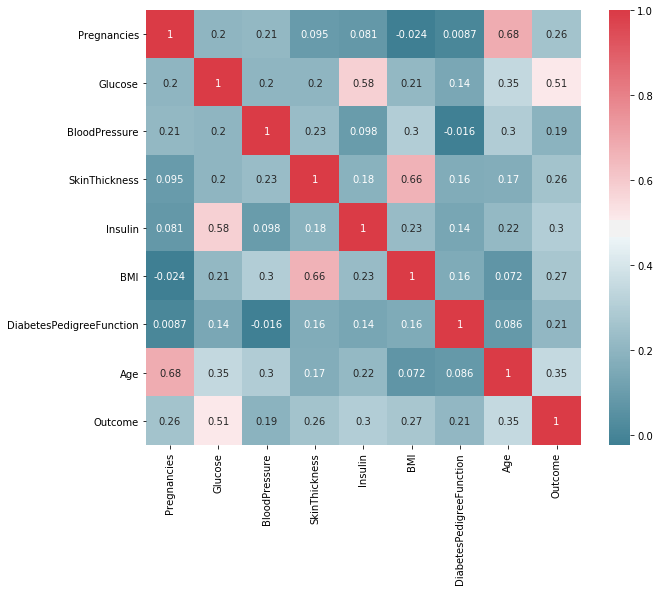

In [133]:
dataset.corr()

f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

### Preprocessing en opsplitsen van de dataset

Splits de dataset in **features en targets**.

In [141]:
features = list(dataset.columns[0: (dataset.columns.size)-1])
print(features)
X = dataset[features].values
y = dataset.Outcome.values

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


**Normaliseer de dataset**. Zorg er dus voor dat de features op een gelijke schaalverdeling staan. Voor het normaliseren kan gebruik gemaakt worden van de *preprocessing.StandardScaler()*. Meer info over het gebruik ervan is te vinden op http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [142]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[-0.71604443 -1.06113999 -0.37477821 ... -0.70884047 -1.03098445
  -0.96591484]
 [-1.02802387  0.46771854 -2.46055366 ...  1.42943328  5.12053937
   0.21206664]
 [-0.09208554 -1.41150341 -1.65833233 ... -0.29544088 -0.79606063
  -0.47508923]
 ...
 [-0.40406498 -1.09299121 -1.01655527 ... -0.666075    0.70629173
  -0.86774972]
 [ 2.09177058 -0.67892536  0.42744312 ... -0.02459287 -1.01938327
   3.15702036]
 [ 0.53187335 -0.04190097  0.10655459 ... -0.97968848 -0.80476151
  -0.08242873]]


Creëer een **trainingset en een testset**. Zorg dat je minimum 100 patiënten in de testset hebt. 

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=0)

### Trainen van een logistic regression classifier en testen van het bekomen model

Train een logistic regression classifier op de training data. Kies C=1 als startwaarde. Mocht de dataset niet gebalanceerd zijn (de ene klasse komt frequenter voor dan de andere klasse) dan kan je bij de creatie van het logistic regression model de parameter class_weight='balanced' meegeven. Meer info: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Test het getrainde model op de test set. Bepaal hierbij de confusion matrix, de accuracy en het classification report. Wat zijn de bevindingen?

Probeer de performantie van de classifier te verhogen door de parameter C te veranderen.

In [148]:
logreg = linear_model.LogisticRegression(C=0.1)
# hoe kleiner de C hoe sterker de regularisatie

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)



print(classification_report(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)

print(confusion_matrix(y_test,y_pred))


             precision    recall  f1-score   support

          0       0.82      0.90      0.86       103
          1       0.78      0.64      0.70        55

avg / total       0.81      0.81      0.81       158

81.0126582278481
[[93 10]
 [20 35]]


### Feature engineering
Creeër hogere orde features door gebruik te maken van *preprocessing.PolynomialFeatures*. Meer info is te vinden op http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

Experimenteer met verschillende ordes en gebruik de regularisatieparameter C om de performantie te verhogen.

Opgepast: het kiezen van een te hoge orde zorgt voor een exponentiële toename aan features. Advies is om niet hoger te gaan dan 4de orde

In [158]:
orde = 4
poly = PolynomialFeatures(orde)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
print(X_test_poly.shape)


logreg_poly = linear_model.LogisticRegression(C=1)
logreg_poly.fit(X_train_poly, y_train)

y_pred = logreg_poly.predict(X_test_poly)
print(classification_report(y_test,y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred )*100)

(79, 495)
             precision    recall  f1-score   support

          0       0.81      0.96      0.88        54
          1       0.87      0.52      0.65        25

avg / total       0.83      0.82      0.81        79

[[52  2]
 [12 13]]
82.27848101265823


Wat zijn de bevindingen? Formuleer een conclusie. Bespreek hierin de performantie van de getrainde modellen. Wat is de invloed van de parameter C en van het aantal features? Heb je te maken gehad met underfitting en overfitting? Welke accuracy werd bekomen en hoe zit het met de Recall en Precision? Is de grootte van de trainingset voldoende?

### Voorspel aan de hand van het getrainde model

Voorspel of iemand met onderstaande medische parameters als dan niet diabetes heeft. Geef ook de zekerheid van het model weer (kansen dat de patiënt tot een bepaalde klasse behoort).

Pregnancies: 2 -
Glucose: 132 -
BloodPressure: 74 - 
SkinThickness: 20 - 
Insulin: 21 - 
BMI: 24.3 - 
DiabetesPedigreeFunction: 128 - 
Age: 37

In [169]:
diabetes = np.array([2,132,74,20,21,24.3,1.28,37])

diabetes = scaler.transform(diabetes.reshape(1,-1))

y_diabetes = logreg.predict(diabetes.reshape(1,-1))

y_diabetes_prob  = logreg.predict_proba(diabetes.reshape(1,-1))

print(y_diabetes)
print(y_diabetes_prob)

[0]
[[0.71096729 0.28903271]]


## Opdracht 3: Kankerdetectie

Train een model om te voorspellen of een bepaalde tumor goedaardig (benign) of kwaadaardig (malignant) is.
Gebruik daarvoor de dataset *cancer.csv*

Baseer je op de methodieken uit voorgaande opdrachten om tot een zo goed mogelijk resultaat te komen. 
**Bespreek** telkens de gemaakte keuzes en resultaten en kom tot een duidelijk besluit.

Tip: een classifier kan enkel maar getraind worden met numerieke waarden. Vervang daarom bij de feature diagnose de twee klasses die voorkomen door 0 en 1, waarbij 0 staat voor goedaardig en 1 voor kwaadaardig.


In [196]:
dataset = pd.read_csv('cancer.csv')
dataset.diagnosis = dataset.diagnosis.replace('M',1)
dataset.diagnosis = dataset.diagnosis.replace('B',0)
dataset.head()

klasses = dataset.diagnosis.unique()
print(klasses)

g = dataset.groupby('diagnosis')
g.diagnosis.count()


[1 0]


diagnosis
0    357
1    211
Name: diagnosis, dtype: int64

In [197]:
#splitsen

features = list(dataset.columns[2:-1])
X = dataset[features].values
y = dataset.diagnosis.values


#normaliseren

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[ 1.83208378 -0.35832707  1.68910604 ...  1.09526221 -0.24044363
   0.28529387]
 [ 1.58210603  0.45385958  1.56958968 ...  1.96646779  1.16385786
   0.2053006 ]
 [-0.76711673  0.25081292 -0.59077158 ...  2.18809026  6.08623563
   4.95045676]
 ...
 [ 0.70434323  2.04789258  0.6752776  ...  0.41969578 -1.10613122
  -0.31576665]
 [ 1.84060575  2.33962629  1.98583632 ...  2.30272257  1.93516598
   2.22846365]
 [-1.80679694  1.22170271 -1.81313547 ... -1.74761915 -0.04354852
  -0.74961903]]


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.20)

logreg = linear_model.LogisticRegression(C=1)
# hoe kleiner de C hoe sterker de regularisatie

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)



print(classification_report(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)

print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98        71
          1       0.98      0.95      0.96        43

avg / total       0.97      0.97      0.97       114

97.36842105263158
[[70  1]
 [ 2 41]]


Voorspel of een gezwel met onderstaande parameters goedaardig of kwaadaardig is.

radius_mean: 17.99 |
texture_mean: 10.38 |
perimeter_mean: 122.8 |
area_mean: 1001 |
smoothness_mean: 0.1184 |
compactness_mean: 0.2776 |
concavity_mean: 0.3001 |
concave points_mean: 0.1471 |
symmetry_mean: 0.2419 |
fractal_dimension_mean: 0.07871 |
radius_se: 1.095 |
texture_se: 0.9053 |
perimeter_se: 8.589 |
area_se:153.4 |
smoothness_se:0.006399 |
compactness_se: 0.04904 |
concavity_se: 0.05373 |
concave points_se: 0.01587 |
symmetry_se: 0.03003 |
fractal_dimension_se: 0.006193 |
radius_worst: 25.38 |
texture_worst: 17.33 |
perimeter_worst: 184.6 |
area_worst: 2019 |
smoothness_worst: 0.1622 |
compactness_worst: 0.6656 |
concavity_worst: 0.7119 |
concave points_worst: 0.2654 |
symmetry_worst: 0.4601 |
fractal_dimension_worst: 0.1189 |


In [202]:
cancer = np.array([17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189])


cancer = scaler.transform(cancer.reshape(1,-1))

y_predict = logreg.predict(cancer)
print(y_predict)
y_proba = logreg.predict_proba(cancer)
print(y_proba)

[1]
[[7.66982478e-10 9.99999999e-01]]


In [204]:
orde = 2
poly = PolynomialFeatures(orde)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=15)
print(X_test_poly.shape)


logreg_poly = linear_model.LogisticRegression(C=0.5)
logreg_poly.fit(X_train_poly, y_train)

y_pred = logreg_poly.predict(X_test_poly)
print(classification_report(y_test,y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred )*100)

(114, 496)
             precision    recall  f1-score   support

          0       0.99      0.99      0.99        73
          1       0.98      0.98      0.98        41

avg / total       0.98      0.98      0.98       114

[[72  1]
 [ 1 40]]
98.24561403508771
